In [5]:
import sys
import os
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

random.seed(42)

sys.path.append(os.path.join(os.getcwd(), '../..'))
from ConuForecast.src.tseries_dataset import TseriesManager, DBconnector

In [6]:
conn = DBconnector('172.17.0.1', 5555, 'base-ina', 'postgres', 'postgres')

EVENT = 'sjj-47'
MODEL = f'model_{EVENT}'
PRECIP = f'precipitation_{EVENT}'
# ET = '2017-01-01 10:15:00'
ET = '2019-10-11 00:10:00'
ATTRS = {
    'nodes': ['elevation', 'area', 'imperv', 'slope','rainfall_acc', 'depth_above_invert'],
    'edges': ['flow_rate', 'flow_velocity']
    }

conu_basin_tseries = TseriesManager(model=MODEL, event=EVENT, precip=PRECIP, conn=conn)

In [7]:
agg_df = pd.DataFrame()
n_nodes = 10#len(conu_basin_tseries.get_nodes())
samples = random.sample(conu_basin_tseries.get_nodes(), n_nodes)


for node in tqdm(samples):
    dataset = conu_basin_tseries.tseries_for_superv_learning(
    node,
    ATTRS['nodes'],
    n_in=1,
    n_out=1
    )
    agg_df = agg_df.append(dataset, ignore_index=True)

100%|██████████| 10/10 [00:00<00:00, 34.34it/s]


In [8]:
agg_df

,0,1,2,3,4,5
0,17.001,0.293,5.0,0.546,0.0,0.000600
1,17.001,0.293,5.0,0.546,15.0,0.024000
2,17.001,0.293,5.0,0.546,15.0,0.044829
3,17.001,0.293,5.0,0.546,15.0,0.047384
4,17.001,0.293,5.0,0.546,15.0,0.053210
...,...,...,...,...,...,...
1435,8.764,0.280,72.0,0.567,0.0,0.000147
1436,8.764,0.280,72.0,0.567,0.0,0.000145
1437,8.764,0.280,72.0,0.567,0.0,0.000143
1438,8.764,0.280,72.0,0.567,0.0,0.000142


In [5]:
cols = a.columns.tolist()
cols_y = [col for col in cols if ('var2(t)' in col)]
cols_X = [col for col in cols if ('var1(t-' in col)]
cols = cols_X + cols_y
reframed = a.loc[:, cols]

reframed

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var2(t)
0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
571,NaN,NaN,NaN,NaN,NaN,NaN,0.012371
572,NaN,NaN,NaN,NaN,NaN,NaN,0.012330
573,NaN,NaN,NaN,NaN,NaN,NaN,0.012289
574,NaN,NaN,NaN,NaN,NaN,NaN,0.012248


<AxesSubplot:>

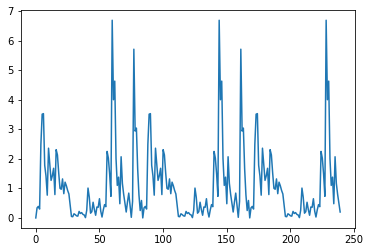

In [13]:
agg_df.iloc[:240,4].plot()

In [7]:
agg_df.to_csv('../../data/processed/agg_df.csv')

In [6]:
agg_df = pd.read_csv('../../data/processed/agg_df.csv')

In [3]:
a= conu_basin_tseries.tseries_for_superv_learning(
    'NODO4646',
    ATTRS['nodes'],
    n_in=3,
    n_out=3,
    dropnan=False
    )
# b['depth_above_invert'].plot()
a

,0,1,2,3,4,5,6,7
0,13.537,0.518,72.0,0.752,0.00,0.00,0.00,0.000000
16,13.537,0.518,72.0,0.752,0.00,0.00,0.34,0.000000
17,13.537,0.518,72.0,0.752,0.00,0.34,0.00,0.000000
18,13.537,0.518,72.0,0.752,0.34,0.00,0.00,0.000000
19,13.537,0.518,72.0,0.752,0.00,0.00,0.39,0.000000
...,...,...,...,...,...,...,...,...
571,13.537,0.518,72.0,0.752,0.00,0.00,0.00,0.004216
572,13.537,0.518,72.0,0.752,0.00,0.00,0.00,0.004202
573,13.537,0.518,72.0,0.752,0.00,0.00,0.00,0.004187
574,13.537,0.518,72.0,0.752,0.00,0.00,0.00,0.004173


<AxesSubplot:>

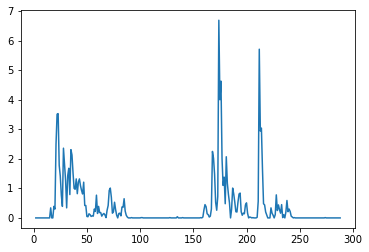

In [23]:
teta.diff().plot()

In [14]:
cols = agg_df.columns.tolist()

cols_y = [col for col in cols if ('var2' in col) & (('+' in col) | ('(t)' in col))]

cols_X = [col for col in cols if ('var1' in col) & ('-' in col)]

cols = cols_X + cols_y

agg_df.loc[:, cols]

,var1(t-3),var1(t-2),var1(t-1),var2(t),var2(t+1),var2(t+2)
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2825,112.889999,112.889999,112.889999,0.001295,0.001264,0.001231
2826,112.889999,112.889999,112.889999,0.001264,0.001231,0.001197
2827,112.889999,112.889999,112.889999,0.001231,0.001197,0.001164
2828,112.889999,112.889999,112.889999,0.001197,0.001164,0.001131


In [ ]:
agg_df = pd.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# split into train and test sets
values = agg_df.values
n_train_hours = 1000000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-3], train[:, -3:-1]
test_X, test_y = test[:, :-3], test[:,-3: -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model = MultiOutputRegressor(model)
# fit network
history = model.fit(train_X, train_y, epochs=7, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

(1000000, 1, 6) (1000000, 2) (1800081, 1, 6) (1800081, 2)


ValueError: Found array with dim 3. Estimator expected <= 2.

array([[ 1.47777849,  2.37218316],
       [ 2.22271246,  2.84083005],
       [ 3.09931766,  0.99357876],
       ...,
       [-3.40060859, -0.18559885],
       [-2.94107284,  0.79511451],
       [-3.02118271,  1.59756689]])

In [6]:
data = conu_basin_tseries.tseries_for_superv_learning(
    'NODO369',
    ATTRS['nodes'],
    n_in=3,
    n_out=3
    ).values
data

array([], shape=(0, 7), dtype=float32)

In [36]:
y_pred = [model.predict_on_batch(i.reshape((1,1,6)))[0][0] for i in data.reshape((1,287,6))[0]]

ValueError: cannot reshape array of size 0 into shape (1,287,6)

In [37]:
y_true = conu_basin_tseries.tseries_for_superv_learning(
    'NODOOUT1',
    ATTRS['nodes']
    ).iloc[:,-1].values

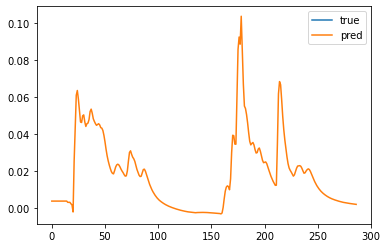

In [38]:
from matplotlib import pyplot

pyplot.plot(y_true, label='true')
pyplot.plot(y_pred, label='pred')
pyplot.legend()
pyplot.show()

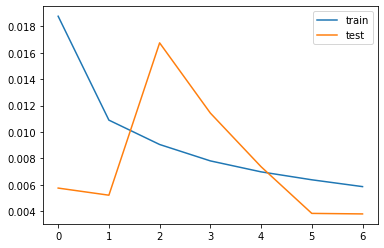

ValueError: Error when checking input: expected lstm_3_input to have 3 dimensions, but got array with shape (435000, 6)

In [18]:
from matplotlib import pyplot

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

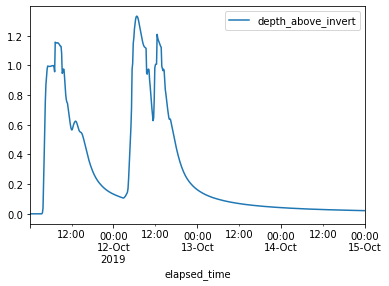

In [17]:
pd.DataFrame(b).plot()

In [8]:
l = []
for node in conu_basin_tseries.get_nodes()[20:40]:
    result = conu_basin_tseries.inp_tseries_rainfall(
        node,
        ['area', 'slope', 'imperv', 'rainfall'],
        )
    if result != None:
        l.append(result)

In [9]:
pd.DataFrame(l[0])

,subcatchment_id,outlet,area,imperv,width,slope,curb_len,elapsed_time,rainfall,format
0,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-11 00:00:00,0.00,CUMULATIVE
1,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-11 00:10:00,0.00,CUMULATIVE
2,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-11 00:20:00,0.00,CUMULATIVE
3,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-11 00:30:00,0.00,CUMULATIVE
4,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-11 00:40:00,0.00,CUMULATIVE
...,...,...,...,...,...,...,...,...,...,...
284,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-12 23:20:00,112.89,CUMULATIVE
285,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-12 23:30:00,112.89,CUMULATIVE
286,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-12 23:40:00,112.89,CUMULATIVE
287,CUENCA8475,NODO10014,0.213,68.0,92.67,1.167,46.152,2019-10-12 23:50:00,112.89,CUMULATIVE


<AxesSubplot:>

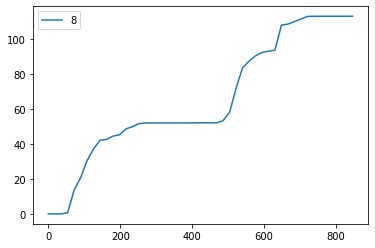

In [26]:
import pandas as pd
import datatable as dt

a = pd.DataFrame(l)

a[a[1] == 'NODO10014'][[8]].plot()

In [37]:
l = []
for node in conu_basin_tseries.get_nodes()[20:40]:
    result = conu_basin_tseries.timeseries(
        item=node,
        var=['depth_above_invert']
        )
    l.append(result)

In [40]:
pd.concat([df for df in l])

,node_id,depth_above_invert
elapsed_time,,
2019-10-11 00:10:00,NODO10014,0.000000
2019-10-11 00:20:00,NODO10014,0.000000
2019-10-11 00:30:00,NODO10014,0.000000
2019-10-11 00:40:00,NODO10014,0.000000
2019-10-11 00:50:00,NODO10014,0.000000
...,...,...
2019-10-14 23:20:00,NODO10031,0.000953
2019-10-14 23:30:00,NODO10031,0.000949
2019-10-14 23:40:00,NODO10031,0.000945


<AxesSubplot:xlabel='elapsed_time'>

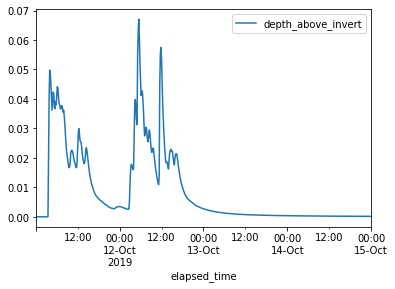

In [41]:
l[0].plot()